# Handwritten Digit Recognition
 **Performed by:** <br>
 Name: Giridhar Sreekumar <br>
 Batch: ML 7-D <br>
 Date: 20 January 2026

## ***Description:*** Classify digits (0–9) from images of handwritten digits using ML

In [2]:
#Required libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
#Load the dataset
digits=load_digits()

X=digits.data
y=digits.target

## Exploratory Data Analysis (EDA)

The purpose of EDA in this project is to visually understand the digit images and their corresponding labels.  
Since the dataset consists of grayscale image pixel values that are already numerical and clean, extensive statistical EDA is not required.

Basic inspection was performed to verify the number of samples and features, and sample digit images were visualized to understand how handwritten digits are represented as pixel intensities.  
Class distribution was also examined to ensure that the dataset is balanced.


In [37]:
#Dataset overview
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


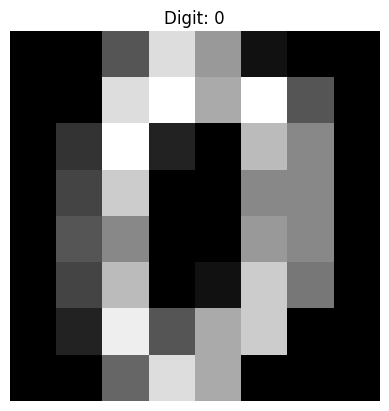

In [21]:
##Sample Image visualization
plt.imshow(digits.images[0],cmap='gray')
plt.title(f"Digit: {y[0]}")
plt.axis('off')
plt.show()

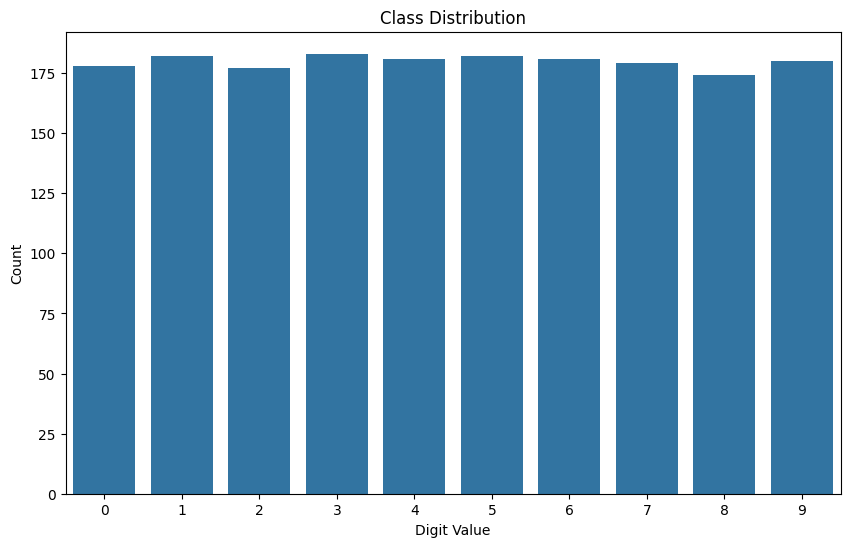

In [38]:
##Class Distribution
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.xlabel('Digit Value')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Normalization was performed to ***rescale*** pixel intensity values to a common range between 0 and 1. This ensures uniform feature scaling, improves numerical stability, and makes the data suitable for machine learning algorithms that are sensitive to feature magnitudes. Although Random Forest is not strictly scale-dependent, normalization was applied as a standard preprocessing step and to maintain ***consistency*** across models.

In [15]:
X=X/16.0

In [25]:
##  ========================= TRAIN/TEST SPLIT ============================
X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state = 42
)

In [28]:
## ======================== RANDOM FOREST MODEL ====================================
model = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42
)

model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [32]:
## ====================== PREDICTION ==================================
y_pred=model.predict(X_test)

**Reasoning:** A model has been trained using random forest classifier. The efficiency of the model is evaluated in the next step.

In [39]:
## ====================== MODEL EVALUATION ==================================
accuracy = accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification report : \n{cr}")

Accuracy: 1.0
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        40

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



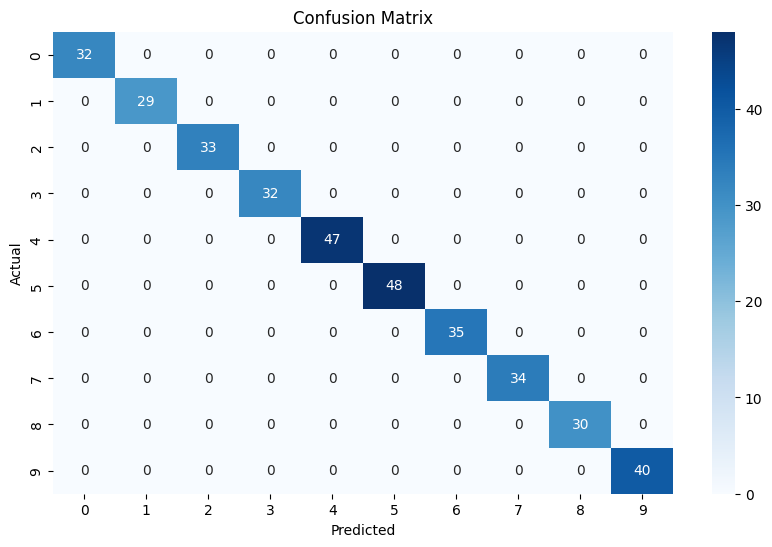

In [35]:
##Confusion Matrix Visualisation
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

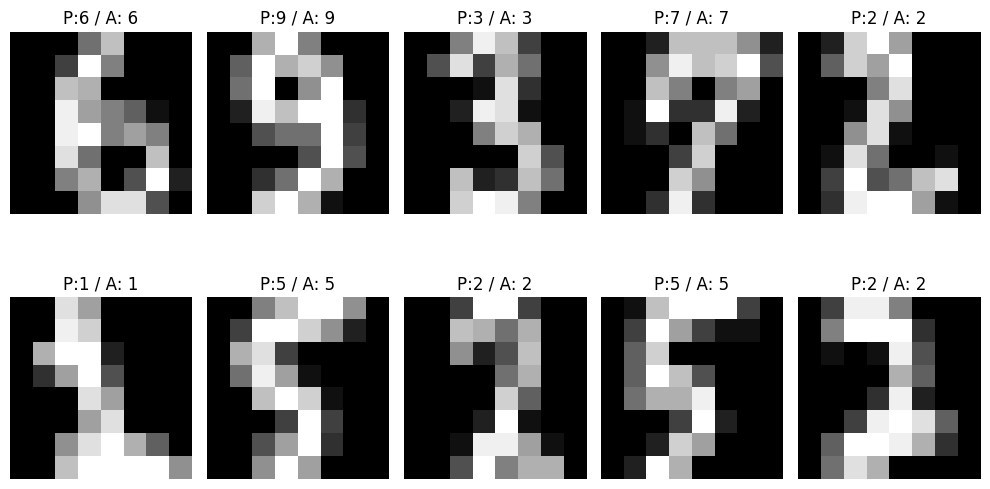

In [36]:
##Display predictions(image form)
plt.figure(figsize=(10,6))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i].reshape(8,8),cmap='gray')
  plt.title(f"P:{y_pred[i]} / A: {y_test[i]}")
  plt.axis('off')

plt.tight_layout()
plt.show()

## Model Evaluation Summary
The Random Forest Classifier achieved high accuracy in calssifying the handwritten digits from 0-9.The evaluation metrics and confusion matrix indicate strong predictive performance across all digit classes, with minimal misclassification. These results confirm that Random Forest is effective for image-based classification tasks when pixel values are represented as numerical features.

***------------------------------ CONCLUSION ----------------------------***
* The handwritten digits dataset was successfully analyzed to understand its structure and numerical representation of the digit images.
* Initial inspection confirmed that the dataset was clean, well-structured, and contained no missing or duplicate values.
* Exploratory analysis involved visualizing sample digits images to understand how handwritten digits are represented as pixel intensity values.
* Pixel values were normalized to ensure uniform feature scaling and stable model training.
* The dataset was split into training and testing sets to evaluate model perfomance on unseen data.
* A Random Forest Classifier was trained and achieved high classification accuracy, demonstrating that classical machine learning models can effectively classify handwritten digits without requiring neural networks for small and structured image datasets.
